<h1>Coursera Capstone Project</h1>
<h1>The Battle of Neighborhoods (Week 4)</h1>

<h1><b>Data section</b></h1>

<h3>Question 2 - To Do</h3>
<p>Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare 
location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location 
data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is 
only Foursquare location data.</p>

In [3]:
# A description of the data and how it will be used to solve the problem. (15 marks)

<h2><b>2. Data Section</b></h2>
<h3><b>Data description and the sources used o solve the business problem.</b></h3>

<h2><b>Description of the Data</b></h2>
<h4>The following data is required to answer the issues of the problem:</h4>
<ul>
        <li>
            List of neighborhoods of Miami, Florida with their geodata (latitude and longitude).
        </li>
        <li>
           List of apartments for rent in Miami area with their addresses and price.
        </li>
        <li>
            List of Subway metro stations in Miami with their relative location.
        </li>
         <li>
            Preferably, a list of apartments for rent with additional information, such as price, address, area, # of beds
        </li>
        <li>
            Venues for each Miami neighborhoods ( that can be clustered).
        </li>
        <li>
            Venues for subway metro stations. 
        </li>
    </ul>

<h2><b>How data will help to solve the problem</b></h2>
<h4>The data will be used as follows:</h4>
<ul>
        <li>
        Use Foursquare and geopy data to map top 10 venues for all Miami neighborhoods and clustered in groups ( as per Course LAB).
    </li>
        <li>
        Use foursquare and geopy data to map the location of metro stations , separately and on top of the above clustered map in order 
        to be able to identify the venues and amenities near each metro station, or explore each public transport location separately
     </li>
        <li>
        Use Foursquare and geopy data to map the location of rental places, in some form, linked to the public transport locations.
     </li>
        <li>
        Create a map that depicts, for instance, the average rental price per square ft, around a radious of (1.5 km) around each subway station - or a
        similar metric. I will be able to quickly point to the popups to know the relative price per subway area.
     </li>
        <li>
        Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.
     </li>
        <li>
        Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such
        as Metrorail, etc.
     </li>
    </ul>

<h4>This will help to evaluate the decision of renting and answer the below questions:</h4>
<ul>
        <li>
what is the cost of rent (per square ft) around a mile radius from each Metrorail station?
 </li>
        <li>
what is the area of Miami with best rental pricing that meets criteria established?
 </li>
        <li>
What are the venues of the two best places to live? How the prices compare?
 </li>
        <li>
How venues distribute among Miami neighborhoods and around metro stations?
 </li>
        <li>
Are there tradeoffs between size and price and location?
 </li>
        <li>
Any other interesting statistical data findings of the real estate and overall data.
     </li>
    </ul>

<h2>Reference of venues around current residence in Maryland for comparison to Miami.</h2>

In [2]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install geocoder
!pip install geopy
import geocoder
import os
!pip install folium
import folium # map rendering library

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

print('Libraries imported.')

     |████████████████████████████████| 102kB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 22.5MB/s eta 0:00:01
     |████████████████████████████████| 829kB 36.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0a

<h4>Coordinate of Maryland residence.</h4>

In [4]:
# Owings Mills, Maryland 21112 United States of America
address = 'Owings Mills, Maryland'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Maryland residence are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Maryland residence are 39.4010753, -76.796299.


In [5]:
neighborhood_latitude= 39.4010753
neighborhood_longitude = -76.796299

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CLIENT_ID = 'LE31KB1HNQNMQCVJWAI50CEALQI4AN4G5MEV3MCZXK0FSLGD' # My Foursquare ID
CLIENT_SECRET = 'WI1QAVFE1N5RREOTPET0C4QQTI4ZMK41MDG4ZHE1BABJP4KW' # My Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LE31KB1HNQNMQCVJWAI50CEALQI4AN4G5MEV3MCZXK0FSLGD
CLIENT_SECRET: WI1QAVFE1N5RREOTPET0C4QQTI4ZMK41MDG4ZHE1BABJP4KW


In [7]:
url= 'https://api.foursquare.com/v2/venues/explore?&client_id=LE31KB1HNQNMQCVJWAI50CEALQI4AN4G5MEV3MCZXK0FSLGD&client_secret=WI1QAVFE1N5RREOTPET0C4QQTI4ZMK41MDG4ZHE1BABJP4KW&v=20180604&ll=39.4010753,-76.796299&radius=500&limit=100'
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=LE31KB1HNQNMQCVJWAI50CEALQI4AN4G5MEV3MCZXK0FSLGD&client_secret=WI1QAVFE1N5RREOTPET0C4QQTI4ZMK41MDG4ZHE1BABJP4KW&v=20180604&ll=39.4010753,-76.796299&radius=500&limit=100'

In [8]:
results = requests.get(url).json()
#results

<h4>Function that extracts the category of the venues near Owings Mills from the Foursquare lab.</h4>

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
venues = results['response']['groups'][0]['items']
    
SBnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SBnearby_venues =SBnearby_venues.loc[:, filtered_columns]

# filter the category for each row
SBnearby_venues['venue.categories'] = SBnearby_venues.apply(get_category_type, axis=1)

# clean columns
SBnearby_venues.columns = [col.split(".")[-1] for col in SBnearby_venues.columns]

SBnearby_venues.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Taj Palace Owings MIlls,North Indian Restaurant,39.399413,-76.800307
1,Artful Gourmet Bistro,New American Restaurant,39.399300,-76.801364
2,Asian Kitchen,Asian Restaurant,39.399578,-76.799104
3,Red Robin Gourmet Burgers and Brews,Burger Joint,39.403242,-76.794221
4,Yuki Sushi,Sushi Restaurant,39.399449,-76.799871
5,Olive Garden,Italian Restaurant,39.404531,-76.793403
6,"Brookside's Pizzeria, The Original NY Pizza Co.",Pizza Place,39.399343,-76.800756
7,Baskin-Robbins,Ice Cream Shop,39.399234,-76.799813
8,APlus at Sunoco,Coffee Shop,39.400044,-76.798403
9,New York & Company,Women's Store,39.399051,-76.793292


<h4>Map of Owings Mills in Maryland with venues near residence place - for project reference</h4>

In [11]:

# create map of Southbank Melbourne using latitude and longitude values
map_sb = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(SBnearby_venues['lat'], SBnearby_venues['lng'], SBnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_sb)  
    
map_sb

In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

miami_data = pd.read_csv('CC')
miami_data.head()

,County,Neighborhood,Latitude,Longitude,Cluster Labels
0,Miami,Allapattah,25.815,-80.224,0.0
1,Miami,Arts & Entertainment District,25.799,-80.190,1.0
2,Miami,Brickell,25.758,-80.193,1.0
3,Miami,Buena Vista,25.813,-80.192,1.0
4,Miami,Coconut Grove,25.712,-80.257,2.0


In [13]:
miami_data.tail()

,County,Neighborhood,Latitude,Longitude,Cluster Labels
20,Miami,Venetian Islands,25.791,-80.161,2.0
21,Miami,Virginia Key,25.736,-80.155,3.0
22,Miami,West Flagler,25.775,-80.243,1.0
23,Miami,Wynwood,25.804,-80.199,1.0
24,Miami,Downtown,25.774,-80.193,1.0


In [14]:
miami_merged = pd.read_csv('Miami_merged.csv')
miami_merged.head()

,Unnamed: 0,County,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Miami,Allapattah,25.815,-80.224,0.0,Department Store,Lounge,French Restaurant,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant
1,1,Miami,Arts & Entertainment District,25.799,-80.190,1.0,Restaurant,Gym,Ice Cream Shop,Spa,Beach,Cupcake Shop,Moving Target,Paper / Office Supplies Store,Park,Pizza Place
2,2,Miami,Brickell,25.758,-80.193,1.0,Hotel,Italian Restaurant,Japanese Restaurant,Café,Sandwich Place,Seafood Restaurant,Juice Bar,Bar,Bank,Harbor / Marina
3,3,Miami,Buena Vista,25.813,-80.192,1.0,Italian Restaurant,Jewelry Store,Café,Boutique,Ice Cream Shop,Big Box Store,Indian Restaurant,Leather Goods Store,Furniture / Home Store,Mediterranean Restaurant
4,4,Miami,Coconut Grove,25.712,-80.257,2.0,Park,American Restaurant,Boat or Ferry,Event Space,Food Truck,Food,Flea Market,Fish Market,Fast Food Restaurant,Wings Joint


In [24]:
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns
# create map of Miami using latitude and longitude values from Nominatim
latitude= 25.815
longitude= -80.224

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(miami_data['Latitude'], miami_data['Longitude'], miami_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

In [25]:
## kk is the cluster number to explore
kk = 2
miami_merged.loc[miami_merged['Cluster Labels'] == kk, miami_merged.columns[[1] + list(range(5, miami_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Miami,2.0,Park,American Restaurant,Boat or Ferry,Event Space,Food Truck,Food,Flea Market,Fish Market,Fast Food Restaurant,Wings Joint
20,Miami,2.0,Park,Lounge,Boat or Ferry,Empanada Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Wings Joint


In [28]:
mfl_rent = pd.read_csv('Miami_flats_price.csv')
mfl_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Allapattah,2.94,5,3400,10000,NaN,NaN
1,East 97th Street,Arts & Entertainment District,3.57,3,2100,7500,NaN,NaN
2,West 105th Street,Brickell,1.89,4,2800,5300,NaN,NaN
3,Cypress Bend,Buena Vista,3.03,2,1650,5000,NaN,NaN
4,owings Run,Coconut Grove,3.45,2,1450,5000,NaN,NaN


In [29]:
mfl_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
20,East 77th Street,Venetian Islands,5.33,1,750,4000,NaN,NaN
21,East 77th Street,Virginia Key,5.00,1,800,4000,NaN,NaN
22,205 East 92nd Street,West Flagler,7.27,3,2200,15984,NaN,NaN
23,136 West Houston Street,Wynwood,7.60,3,2100,15950,NaN,NaN
24,110 Greenwich Street,Downtown,6.00,6,2000,12000,NaN,NaN


In [30]:
mfl_rent = pd.read_csv('Miami_flats_price_LatLong.csv')
mfl_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Allapattah,2.94,5,3400,10000,25.815,-80.224
1,East 97th Street,Arts & Entertainment District,3.57,3,2100,7500,25.799,-80.190
2,West 105th Street,Brickell,1.89,4,2800,5300,25.758,-80.193
3,Cypress Bend,Buena Vista,3.03,2,1650,5000,25.813,-80.192
4,owings Run,Coconut Grove,3.45,2,1450,5000,25.712,-80.257


In [31]:
mfl_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
20,East 77th Street,Venetian Islands,5.33,1,750,4000,25.791,-80.161
21,East 77th Street,Virginia Key,5.00,1,800,4000,25.736,-80.155
22,205 East 92nd Street,West Flagler,7.27,3,2200,15984,25.775,-80.243
23,136 West Houston Street,Wynwood,7.60,3,2100,15950,25.804,-80.199
24,110 Greenwich Street,Downtown,6.00,6,2000,12000,25.774,-80.193


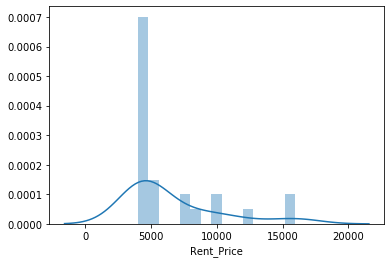

In [33]:
import seaborn as sns
sns.distplot(mfl_rent['Rent_Price'],bins=15)

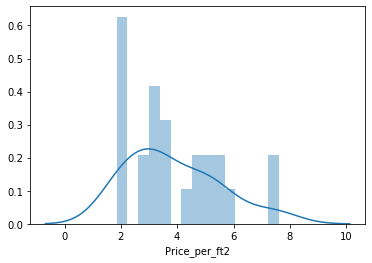

In [34]:
sns.distplot(mfl_rent['Price_per_ft2'],bins=15)

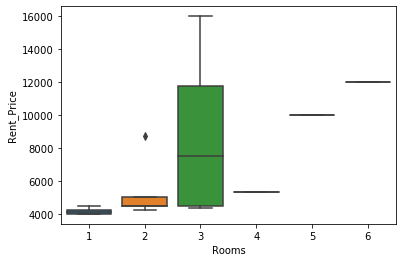

In [35]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mfl_rent)

In [36]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 25.815
longitude= -80.224

map_miami_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mfl_rent['Lat'], mfl_rent['Long'],'$ ' + mfl_rent['Rent_Price'].astype(str)+ ',  '+ mfl_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami_rent) 
    

map_miami_rent

In [38]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 25.815
longitude= -80.224

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mfl_rent['Lat'], mfl_rent['Long'],'$ ' + mfl_rent['Rent_Price'].astype(str)+ mfl_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_miami_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_miami_rent)

map_clusters2

In [39]:
## kk is the cluster number to explore
kk = 3
miami_merged.loc[miami_merged['Cluster Labels'] == kk, miami_merged.columns[[1] + list(range(5, miami_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Miami,3.0,Beach,Wings Joint,French Restaurant,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant


In [40]:
mfl = pd.read_csv('mfl_metrorail.csv')
print(mfl.shape)
mfl.head()

(23, 4)


,sub_station,sub_address,lat,long
0,Allapattah,"3501 NW 12 Avenue, Miami, Fl 33127",25.808705,-80.215403
1,Brickell,"1001 SW First Avenue Miami, Fl 33130",25.763735,-80.195469
2,Brownsville,"5200 NW 27 Avenuem Miami, Fl 33142",25.822028,-80.240729
3,Civic Center,"1501 NW 12 Avenue Miami, Fl 33136",25.789686,-80.215124
4,Coconut Grove,2780 SW 27 Avenue Miami FL 33133,25.739809,-80.238819


In [41]:
# map subway stations 
# create map of Miami using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude= 25.815
longitude= -80.224

map_mflsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mfl['lat'], mfl['long'],  mfl['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mflsub1) 
map_mflsub1

In [42]:
mfl_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Allapattah,2.94,5,3400,10000,25.815,-80.224
1,East 97th Street,Arts & Entertainment District,3.57,3,2100,7500,25.799,-80.190
2,West 105th Street,Brickell,1.89,4,2800,5300,25.758,-80.193
3,Cypress Bend,Buena Vista,3.03,2,1650,5000,25.813,-80.192
4,owings Run,Coconut Grove,3.45,2,1450,5000,25.712,-80.257


In [43]:
# create map of Miami using latitude and longitude values from Nominatim
latitude= 25.815
longitude= -80.224

map_miami_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mfl_rent['Lat'], mfl_rent['Long'],'$ ' + mfl_rent['Rent_Price'].astype(str)+ mfl_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mfl['lat'], mfl['long'],  mfl['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_miami_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_miami_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_miami_rent)

map_miami_rent

In [44]:
# create map of Miami using latitude and longitude values from Nominatim
latitude= 25.815
longitude= -80.224

map_mfl_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mfl_rent['Lat'], mfl_rent['Long'],'$ ' + mfl_rent['Rent_Price'].astype(str)+ ', '+mfl_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mfl_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mfl['lat'], mfl['long'],  mfl['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mfl_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.7).add_to(map_mfl_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mfl_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mfl_one)

map_mfl_one

In [46]:
kk = 2
miami_merged.loc[miami_merged['Cluster Labels'] == kk, miami_merged.columns[[1] + list(range(5, miami_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Miami,2.0,Park,American Restaurant,Boat or Ferry,Event Space,Food Truck,Food,Flea Market,Fish Market,Fast Food Restaurant,Wings Joint
20,Miami,2.0,Park,Lounge,Boat or Ferry,Empanada Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Wings Joint


<h3>Apartment 1 Locations</h3>

In [47]:
## kk is the cluster number to explore
kk = 3
miami_merged.loc[miami_merged['Cluster Labels'] == kk, miami_merged.columns[[1] + list(range(5, miami_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Miami,3.0,Beach,Wings Joint,French Restaurant,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant


<h3>Apartment 2 Locations</h3>

<p>

Apartment Selection-Comparison analysis
Using the "one consolidated map" above, I was able to explore all possibilities since the popups provided the information needed for a good data-driven decision.

The apartment in blue dot 113 Greenwich way is the best location in terms of rent, transportation and venue.

Based on current Maryland venues, I feel that Cluster 3 type of venues is a closer resemblance to my current place. That means that APARTMENT is a better choice and cheaper 
which means I can use it for other expenses.
</p>